In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bike-sharing-demand/test.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/sampleSubmission.csv


In [2]:
train = pd.read_csv("/kaggle/input/bike-sharing-demand/train.csv")
test = pd.read_csv("/kaggle/input/bike-sharing-demand/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
x_train = train.drop(["casual","registered","count"],1)
y_train = train["count"]

In [6]:
x_test = test.drop("datetime",1)
x_train = x_train.drop("datetime",1)

In [7]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,0,0,1,9.84,14.395,81,0.0
1,1,0,0,1,9.02,13.635,80,0.0
2,1,0,0,1,9.02,13.635,80,0.0
3,1,0,0,1,9.84,14.395,75,0.0
4,1,0,0,1,9.84,14.395,75,0.0


In [8]:
x_train["hour"] = train["datetime"].astype("datetime64").dt.hour

In [9]:
x_test["hour"] = test["datetime"].astype("datetime64").dt.hour

In [10]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour
0,1,0,1,1,10.66,11.365,56,26.0027,0
1,1,0,1,1,10.66,13.635,56,0.0000,1
2,1,0,1,1,10.66,13.635,56,0.0000,2
3,1,0,1,1,10.66,12.880,56,11.0014,3
4,1,0,1,1,10.66,12.880,56,11.0014,4


In [11]:
x_train["year"] = train["datetime"].astype("datetime64").dt.year
x_test["year"] = test["datetime"].astype("datetime64").dt.year

In [12]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year
0,1,0,0,1,9.84,14.395,81,0.0,0,2011
1,1,0,0,1,9.02,13.635,80,0.0,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,2,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,2011
4,1,0,0,1,9.84,14.395,75,0.0,4,2011


In [13]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011


In [14]:
x_train["weekday"] = train["datetime"].astype("datetime64").dt.weekday
x_test["weekday"] = test["datetime"].astype("datetime64").dt.weekday

In [15]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3


In [16]:
x_train["month"]=train["datetime"].astype("datetime64").dt.month
x_test["month"]=test["datetime"].astype("datetime64").dt.month


In [17]:
x_train["day"]=train["datetime"].astype("datetime64").dt.day
x_test["day"]=test["datetime"].astype("datetime64").dt.day


In [18]:
x_train["count"]= train["count"]

In [19]:
#통계량을 찍어볼 때 median까지 찍어보기(mean+)/ outliar때문에 평균이 신뢰할 수 없음

x_train.groupby("hour")["count"].median()

hour
0      41.0
1      19.0
2      11.0
3       6.0
4       6.0
5      19.0
6      75.0
7     208.0
8     392.0
9     217.0
10    149.0
11    183.0
12    234.5
13    226.5
14    212.0
15    232.0
16    309.5
17    480.5
18    422.5
19    312.5
20    224.0
21    171.5
22    129.0
23     80.0
Name: count, dtype: float64

In [20]:
#데이터의 갯수가 어느정도 있어야 median이 의미가 있음; 데이터의 개수가 서로 다르거나 매우 적으면 통계량을 신뢰할 수 없음 
x_train["hour"].value_counts()

23    456
20    456
16    456
17    456
18    456
15    456
12    456
19    456
13    456
21    456
14    456
22    456
6     455
11    455
10    455
9     455
7     455
8     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64

In [21]:
#train set 뿐만 아니라 test셋 분포까지 확인해야됨! test set에서도 시간대가 0~23까지 있는지 확인해야됨
x_test["hour"].value_counts()

16    274
17    274
15    273
14    273
13    273
23    272
19    272
8     272
12    272
20    272
9     272
21    272
10    272
18    272
22    272
7     272
11    272
0     271
6     270
1     270
2     267
5     265
3     264
4     255
Name: hour, dtype: int64

In [22]:
import matplotlib.pyplot as plt#밑그림
import seaborn as sns #그래프

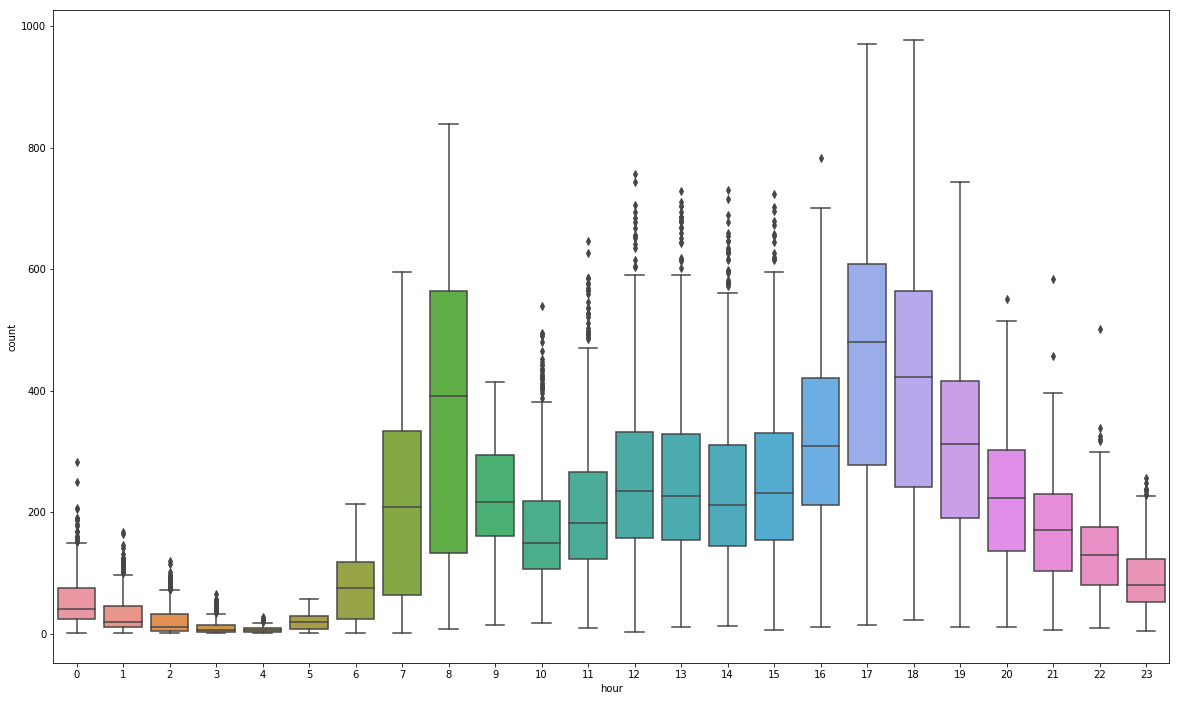

In [23]:
a, b = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(x=x_train["hour"],y=x_train["count"])

시간대별로 자전거 빌리는 패턴이 매우다르다 ! 7~8 출퇴근 시간 증가
최대 - 상위 25% - median (상위 50%) - 하위 25% -최소
이상치 : 데이터의 표준편차 허용범위를 벗어난 수치(점) 
이상치가 너무 많은 시간대 : workingday(주중/주말)을 구분하지 않아서 / 일주일 중의 5일은 주중이기 때문에 count가 낮게 깔리고, 주말의 이상치들이 표준편차 허용범위를 넘어선 값으로 보여짐(일주일 중 단 이틀이어서..)
--> 주말/주중을 따로나눠서 그리기

In [24]:
weekday_df = x_train[x_train["workingday"]==0]

In [25]:
weekend_df =  x_train[x_train["workingday"]==1]

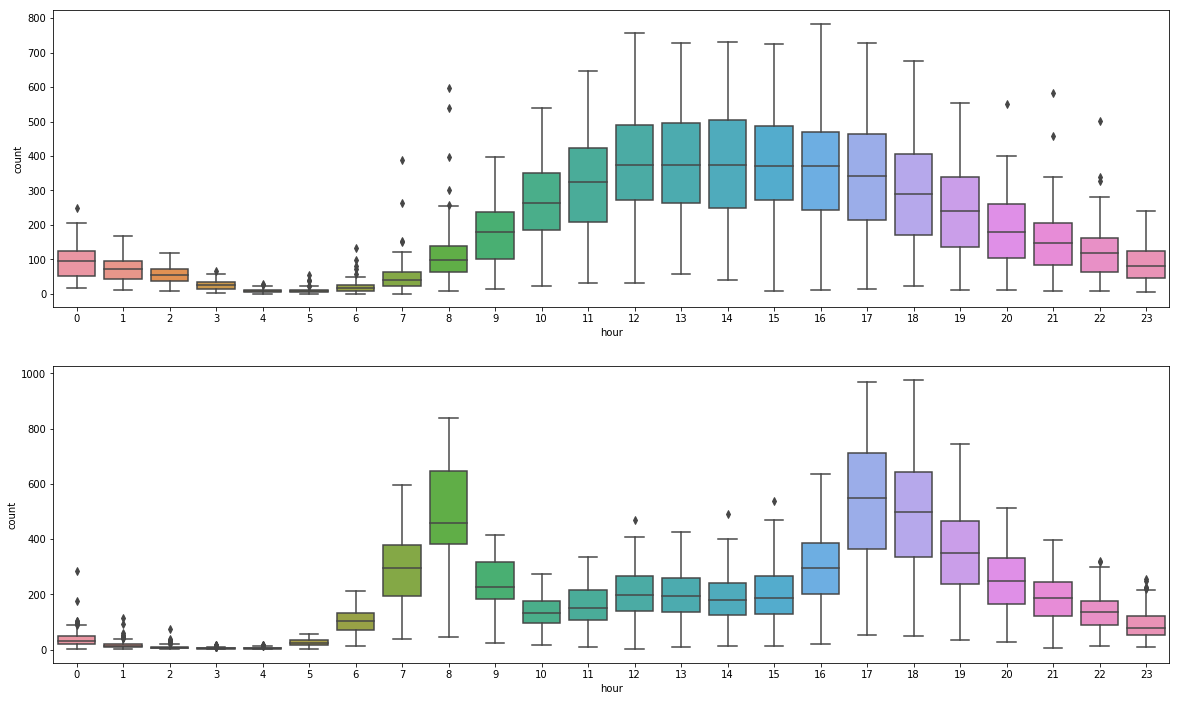

In [26]:
a, b = plt.subplots(2,1,figsize=(20,12))
sns.boxplot(x=weekday_df["hour"],y=weekday_df["count"],ax=b[0])
sns.boxplot(x=weekend_df["hour"],y=weekend_df["count"],ax=b[1])

train -> 1~19일
test -> 21~31일 
서로 날짜가 달라서 예측을 못함; 트리모델은 선형성을 학습하지는 못함; 

근데 모델의 성능이 오히려 떨어졌음;; 다른 이유는?
트리모델 - greedy 알고리즘; 중요한 피처를 집중적으로 학습함; day피처를 중요하다 여기면서 계속 학습; 다른 피처들의 학습을 방해 

In [27]:
x_train["day"].value_counts()

1     575
9     575
5     575
17    575
15    574
19    574
16    574
7     574
8     574
4     574
13    574
14    574
3     573
2     573
12    573
10    572
6     572
11    568
18    563
Name: day, dtype: int64

In [28]:
x_test["day"].value_counts()

21    574
20    574
23    573
24    573
25    572
22    569
26    567
28    563
27    552
29    526
30    514
31    336
Name: day, dtype: int64

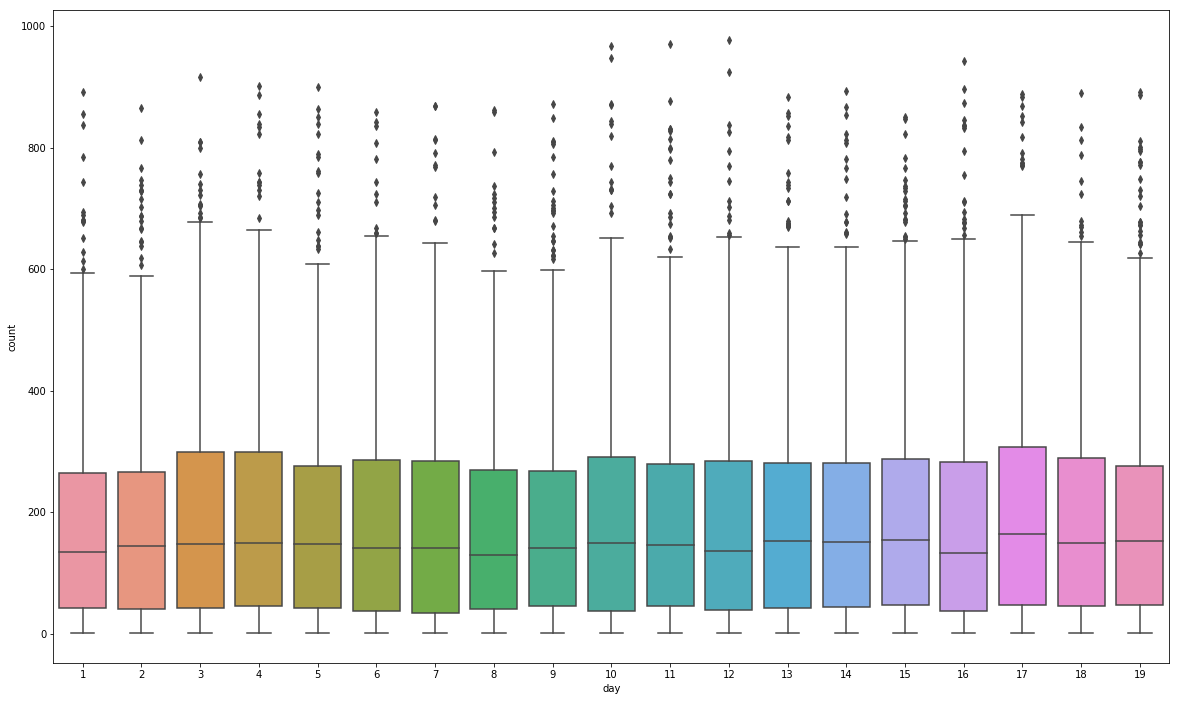

In [29]:
a, b = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(x=x_train["day"],y=x_train["count"])

차이가 있는 그래프임;; 최댓값의 분포도 조금씩 다름 ; 날짜별로 자전거 패턴이 다름; 

In [30]:
x_train["month"].value_counts()
#카테고리별로 갯수차이 -> 몇개 없는 데이터는 지우거나 몇개없는 카테고리는 한군데로 묶음; -> hyperparameter mean_child_simple.....option존재 

7     912
6     912
5     912
12    912
8     912
11    911
10    911
4     909
9     909
3     901
2     901
1     884
Name: month, dtype: int64

In [31]:
x_train.groupby("month")["count"].median()

month
1      65.0
2      78.0
3     100.0
4     133.0
5     182.0
6     206.0
7     209.5
8     193.0
9     188.0
10    180.0
11    162.0
12    138.0
Name: count, dtype: float64

In [32]:
x_test["month"].value_counts()

7     576
5     576
3     572
12    571
8     563
1     545
10    540
6     528
9     528
4     528
11    526
2     440
Name: month, dtype: int64

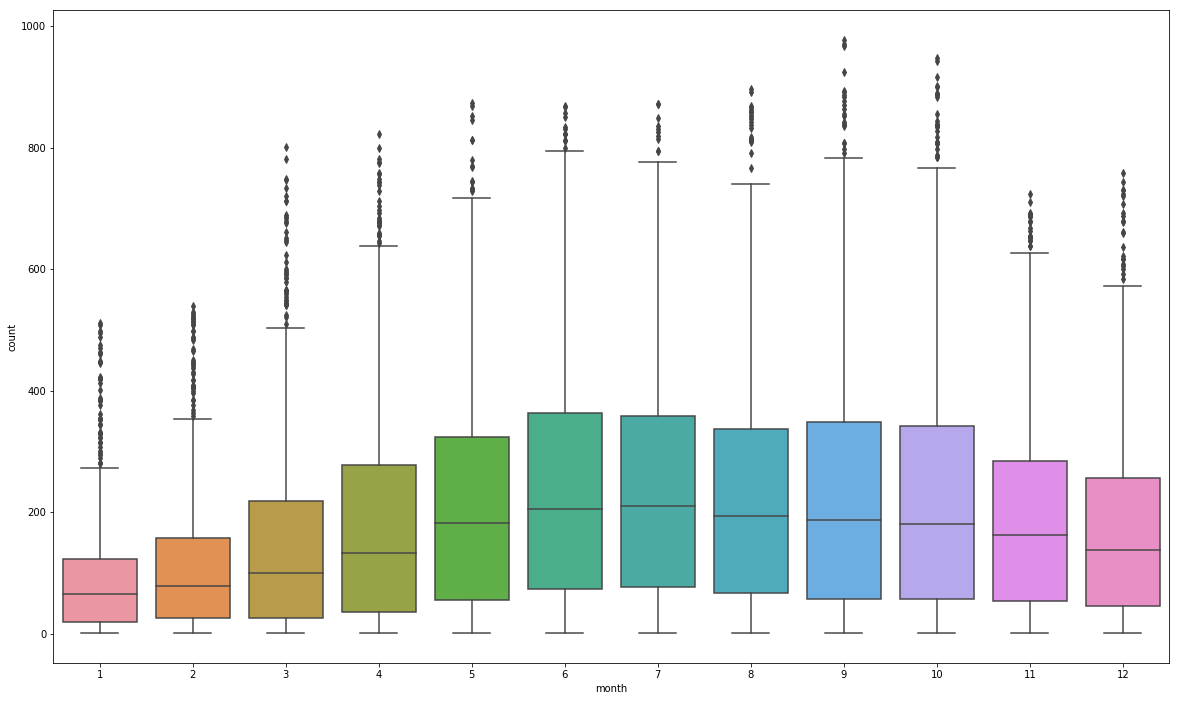

In [33]:
a, b = plt.subplots(1,1,figsize=(20,12))
sns.boxplot(x=x_train["month"],y=x_train["count"])

1. month 정보 추가 -> trainset 학습을 더 잘함; 
: 1~19 패턴과 21~31패턴이 서로다름 , 1~19패턴으로 학습을 더 잘하게 됨 
2. hour weekday year 어떤 데이터가 되도 도움이됨 but 날짜 패턴을 학습하게 하는 month정보는 해가 된다. 

In [34]:
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

모델성능 올리기 -> log변환, outliar를 제거하지 않아도 제거되는 효과 

In [35]:
x_train = x_train.drop(["day","month","count"],1)

In [36]:
x_test = x_test.drop(["day","month"],1)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)

# 필수 -- n_estimators : 학습횟수, 나무의 갯수 default=10, (n_estimators=100)
n_jobs : 학습할 때 모두 사용 가능한 cpu 4개로 학습 (속도 빠르게)

In [38]:
rf.fit(x_train,np.log(y_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [39]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday
0,1,0,1,1,10.66,11.365,56,26.0027,0,2011,3
1,1,0,1,1,10.66,13.635,56,0.0000,1,2011,3
2,1,0,1,1,10.66,13.635,56,0.0000,2,2011,3
3,1,0,1,1,10.66,12.880,56,11.0014,3,2011,3
4,1,0,1,1,10.66,12.880,56,11.0014,4,2011,3


In [40]:
result = np.exp(rf.predict(x_test))

In [41]:
result

array([11.1682012 ,  4.75508819,  2.61785239, ..., 99.33646217,
       99.55703083, 46.81090344])

In [42]:
submission = pd.read_csv("/kaggle/input/bike-sharing-demand/sampleSubmission.csv")

In [43]:
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [44]:
submission["count"] = result
submission.head()

,datetime,count
0,2011-01-20 00:00:00,11.168201
1,2011-01-20 01:00:00,4.755088
2,2011-01-20 02:00:00,2.617852
3,2011-01-20 03:00:00,3.318736
4,2011-01-20 04:00:00,2.752982


In [45]:
submission.to_csv("submission.csv",index=False)